# Projeto: Educação no Rio de Janeiro utilizando a API do Foursquare

A universidade do Brasil, atual UFRJ, foi a primeira sede de um curso de educação superior no Brasil.
O Prédio até então - ironicamente ou não - era destinado as atividades de um hospício.

Utilizando a API do Foursquare foi capturada uma amostra de 50 faculdades do Rio de Janeiro.

O objetivo é entender como uma faculdade ativa o comércio local.

Nesse sentido, dada a localização geográfica de cada faculdade de nossa amostra, estuda-se o entorno geográfico a fim
de capturar a perfil microeconômico que circunda o centro universitário.

In [45]:
# Importando bibliotecas

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [278]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [71]:
# Credenciais

CLIENT_ID = 'V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11' # your Foursquare ID
CLIENT_SECRET = 'XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU' # your Foursquare Secret
ACCESS_TOKEN = 'Z1WTANDL2KHSY43LPI220P2VQ2YTEIHEUA1ENRJM2CA32TE1' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11
CLIENT_SECRET:XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU


In [72]:
# Ponto de partida:
# Universidade do Brasil
latitude = -22.9523336
longitude = -43.1766622

In [77]:
# Query
search_query = 'Faculdade'
radius = 50000
#print(search_query + ' .... OK!')

In [78]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11&client_secret=XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU&ll=-22.9523336,-43.1766622&oauth_token=Z1WTANDL2KHSY43LPI220P2VQ2YTEIHEUA1ENRJM2CA32TE1&v=20180604&query=Faculdade&radius=50000&limit=100'

In [79]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '616de66871e16d58ace6c88b'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4f58f853e4b09ba0e3a22422',
    'name': 'Faculdade de Educação',
    'location': {'address': 'UFRJ Campus Praia Vermelha',
     'lat': -22.952498380284172,
     'lng': -43.1749881737035,
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.952498380284172,
       'lng': -43.1749881737035}],
     'distance': 172,
     'postalCode': '22290-902',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'state': 'RJ',
     'country': 'Brasil',
     'formattedAddress': ['UFRJ Campus Praia Vermelha',
      'Rio de Janeiro, RJ',
      '22290-902']},
    'categories': [{'id': '4bf58dd8d48988d1a8941735',
      'name': 'General College & University',
      'pluralName': 'General Colleges & Universities',
      'shortName': 'Education',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/other_',

In [80]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-80-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4f58f853e4b09ba0e3a22422,Faculdade de Educação,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1634592360,False,UFRJ Campus Praia Vermelha,-22.952498,-43.174988,"[{'label': 'display', 'lat': -22.9524983802841...",172,22290-902,BR,Rio de Janeiro,RJ,Brasil,"[UFRJ Campus Praia Vermelha, Rio de Janeiro, R...",NaN,NaN
1,4de7818d7d8b1f2dd298e37e,Faculdade de Educação,"[{'id': '4bf58dd8d48988d1ac941735', 'name': 'C...",v-1634592360,False,NaN,-22.952570,-43.175300,"[{'label': 'display', 'lat': -22.9525702675144...",142,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rio de Janeiro, RJ]",NaN,NaN
2,50573b84e4b0cbb61bc4a469,Faculdade de História,"[{'id': '4bf58dd8d48988d19d941735', 'name': 'C...",v-1634592360,False,UNIRIO Campus 458,-22.953875,-43.174364,"[{'label': 'display', 'lat': -22.9538752945596...",291,22290-240,BR,Rio de Janeiro,RJ,Brasil,"[UNIRIO Campus 458, Rio de Janeiro, RJ, 22290-...",NaN,NaN
3,4e138d75b61c18a826fa18a4,Faculdade São Leopoldo Mandic,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1634592360,False,"R. Gago Coutinho, 55",-22.931460,-43.181325,"[{'label': 'display', 'lat': -22.9314602896907...",2372,22240-000,BR,Rio de Janeiro,RJ,Brasil,"[R. Gago Coutinho, 55 (Laranjeiras), Rio de Ja...",Laranjeiras,NaN
4,5050cdfde4b0269baa162a82,Sala 240 - Faculdade de Educação,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",v-1634592360,False,NaN,-22.952747,-43.175348,"[{'label': 'display', 'lat': -22.9527467372824...",142,NaN,BR,NaN,NaN,Brasil,NaN,NaN,NaN


In [81]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Faculdade de Educação,General College & University,UFRJ Campus Praia Vermelha,-22.952498,-43.174988,"[{'label': 'display', 'lat': -22.9524983802841...",172,22290-902,BR,Rio de Janeiro,RJ,Brasil,"[UFRJ Campus Praia Vermelha, Rio de Janeiro, R...",NaN,4f58f853e4b09ba0e3a22422
1,Faculdade de Educação,College Theater,NaN,-22.952570,-43.175300,"[{'label': 'display', 'lat': -22.9525702675144...",142,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rio de Janeiro, RJ]",NaN,4de7818d7d8b1f2dd298e37e
2,Faculdade de História,College History Building,UNIRIO Campus 458,-22.953875,-43.174364,"[{'label': 'display', 'lat': -22.9538752945596...",291,22290-240,BR,Rio de Janeiro,RJ,Brasil,"[UNIRIO Campus 458, Rio de Janeiro, RJ, 22290-...",NaN,50573b84e4b0cbb61bc4a469
3,Faculdade São Leopoldo Mandic,General College & University,"R. Gago Coutinho, 55",-22.931460,-43.181325,"[{'label': 'display', 'lat': -22.9314602896907...",2372,22240-000,BR,Rio de Janeiro,RJ,Brasil,"[R. Gago Coutinho, 55 (Laranjeiras), Rio de Ja...",Laranjeiras,4e138d75b61c18a826fa18a4
4,Sala 240 - Faculdade de Educação,College Classroom,NaN,-22.952747,-43.175348,"[{'label': 'display', 'lat': -22.9527467372824...",142,NaN,BR,NaN,NaN,Brasil,NaN,NaN,5050cdfde4b0269baa162a82
5,Secretaria - Faculdade de Educação,College Administrative Building,NaN,-22.952093,-43.174652,"[{'label': 'display', 'lat': -22.952093, 'lng'...",207,NaN,BR,NaN,NaN,Brasil,NaN,NaN,5658594e498ed1bb999699d9
6,Faculdades Integradas Hélio Alonso (Facha),University,"R. Muniz Barreto, 51",-22.942699,-43.182551,"[{'label': 'display', 'lat': -22.9426986105173...",1230,22251-090,BR,Rio de Janeiro,RJ,Brasil,"[R. Muniz Barreto, 51 (Campus Botafogo), Rio d...",Campus Botafogo,4bb0f959f964a5203d6f3ce3
7,Faculdade de Filosofia UNIRIO,College History Building,NaN,-22.954729,-43.168934,"[{'label': 'display', 'lat': -22.9547290802001...",835,NaN,BR,NaN,NaN,Brasil,NaN,NaN,4f75f9a8e4b02ca6e4d427b9
8,Faculdade Senac Santa Luzia,University,"R. Sta. Luzia, 735, 2º Andar",-22.910942,-43.174184,"[{'label': 'display', 'lat': -22.9109419326236...",4614,20030-041,BR,Rio de Janeiro,RJ,Brasil,"[R. Sta. Luzia, 735, 2º Andar (R. México), Rio...",R. México,4c6fe600df6b8cfa5369b64d
9,Faculdade Nacional de Direito (FND),Law School,"R. Moncorvo Filho, 8",-22.907186,-43.190643,"[{'label': 'display', 'lat': -22.9071856563127...",5226,20211-340,BR,Rio de Janeiro,RJ,Brasil,"[R. Moncorvo Filho, 8 (UFRJ, Campus Centro), R...","UFRJ, Campus Centro",4c066488517d0f4775e1f515


In [82]:
dataframe_filtered.name

0                               Faculdade de Educação
1                               Faculdade de Educação
2                               Faculdade de História
3                       Faculdade São Leopoldo Mandic
4                    Sala 240 - Faculdade de Educação
5                  Secretaria - Faculdade de Educação
6          Faculdades Integradas Hélio Alonso (Facha)
7                       Faculdade de Filosofia UNIRIO
8                         Faculdade Senac Santa Luzia
9                 Faculdade Nacional de Direito (FND)
10              Faculdade Presbiteriana Mackenzie Rio
11                           Faculdade de Arquitetura
12              Faculdade de Administração e Finanças
13                             Faculdade de São Bento
14    Faculdade de Turismo e Hotelaria, Bloco H - UFF
15                    Faculdade de Engenharia Química
16                              Faculdade de Economia
17                              Faculdade de Educação
18                      Facu

In [85]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [ ]:
# Entender como escolas e universidades ativam a economia local
# compreender o impacto da educação diretamente no plano microeconomico local
# Decidir onde abrir uma escola ? Quais os impactos 
# o entorno das escolas, suas vias de acesso e o comércio que as cincunda 

In [94]:
#dataframe_filtered [lat, lng]
resultados = []
for i, row in dataframe_filtered.iterrows():
    venue_id = row['id'] 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    resultados.append(requests.get(url).json())

In [113]:
resultados = []
for i, row in dataframe_filtered.iterrows():
    latitude = row['lat']
    longitude =  row ['lng']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    resultados.append(requests.get(url).json())

In [175]:
df = pd.DataFrame(columns = ['nome_faculdade', 'id','nome_estabelecimento', 'estabelecimento_id' , 'categoria_short', 'categoria_plural', 'latitude', 'longitude', 'distancia'])
contador = 0
for faculdade in resultados:
    faculdade_id = dataframe_filtered['id'][contador]
    nome_faculdade = dataframe_filtered['name'][contador]
    contador += 1
    estabelecimentos = faculdade['response']['venues']
    for estabelecimento in estabelecimentos:
        nome = estabelecimento['name']
        estabelecimento_id = estabelecimento['id']
        latitude = estabelecimento['location']['lat']
        longitude = estabelecimento['location']['lng']
        distancia = estabelecimento['location']['distance']
        try:
            categoria_short = estabelecimento['categories'][0]['shortName']
            categoria_plural = estabelecimento['categories'][0]['pluralName']
        except:
            categoria_short = None
            categoria_plural = None
        df = df.append({'nome_faculdade': nome_faculdade, 'id': faculdade_id,'nome_estabelecimento': nome, 'estabelecimento_id': estabelecimento_id, 'categoria_short': categoria_short, 'categoria_plural': categoria_plural, 'latitude': latitude, 'longitude': longitude ,'distancia': distancia}, ignore_index = True)

In [177]:
df

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
0,Faculdade de Educação,4f58f853e4b09ba0e3a22422,CPM - ECO/UFRJ,4bebeed4183895213f010bcf,Lab,College Labs,-22.952759,-43.175019,29
1,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Escola de Comunicação,4bad5993f964a52007493be3,Communications,College Communications Buildings,-22.952750,-43.175239,37
2,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Coordenadoria de Saúde AP 2.1,4d9cdbe58efaa143a79157b7,Government,Government Buildings,-22.952951,-43.175159,53
3,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Education,General Colleges & Universities,-22.952498,-43.174988,0
4,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Theater,College Theaters,-22.952570,-43.175300,32
...,...,...,...,...,...,...,...,...,...
4697,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,AMA Clube de Modelismo,51a7a556498ef3fe909b8e06,Park,Parks,-22.863732,-43.222685,155
4698,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Programa de Pós-Graduação em Linguística,504f3b21e4b0bd89f191e18f,University,Universities,-22.860361,-43.224986,291
4699,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Sala de Estudos,504f3239e4b0c321cd27b7be,Classroom,College Classrooms,-22.860963,-43.225683,299
4700,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Centro de Estudos Afrânio Coutinho,4ecfb91e93ad987b4c315cd9,Student Center,Student Centers,-22.860770,-43.226257,360


In [183]:
df.categoria_short.value_counts()

Classroom                  354
Lab                        332
University                 216
Administrative Building    188
Office                     177
                          ... 
Exhibit                      1
Karaoke                      1
Transportation Services      1
City Hall                    1
Research Station             1
Name: categoria_short, Length: 339, dtype: int64

In [228]:
lista = ['Classroom','Lab','University', 'Administrative Building', 'Office', 'Auditorium', 'Student Center' , 'Education' , 'Academic Building', 'Library', 'Residential','Building']
for i in lista:
    df.drop(df[df['categoria_short'] == i].index, axis = 0, inplace = True)
    

In [229]:
df

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
1,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Escola de Comunicação,4bad5993f964a52007493be3,Communications,College Communications Buildings,-22.952750,-43.175239,37
2,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Coordenadoria de Saúde AP 2.1,4d9cdbe58efaa143a79157b7,Government,Government Buildings,-22.952951,-43.175159,53
4,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Theater,College Theaters,-22.952570,-43.175300,32
9,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Pérgula da Piscina,51450e74e4b0751899297260,Outdoor Event Space,Outdoor Event Spaces,-22.950605,-43.175021,210
10,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Sabores da Serra Sorveteria,566ed9f3498e7d6394668557,Ice Cream,Ice Cream Shops,-22.950616,-43.175021,209
...,...,...,...,...,...,...,...,...,...
4674,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Trailer Bacana Lanches,5216348711d2e364406d441a,Food Truck,Food Trucks,-22.862415,-43.223710,48
4676,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Terraço FAU,5250d49111d2f2de3b3840bb,Arts,College Arts Buildings,-22.861973,-43.222927,60
4687,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,yakisoba lanches,500ec222e4b02b08aa36fbe0,Asian,Asian Restaurants,-22.862839,-43.224140,102
4696,Faculdade de Arquitetura e Urbanismo (FAU),4d529bb080df88bf5e240098,Feira Mix do Mercado Via Brasil,5166e9dee4b048ec93305bfd,Shop,Miscellaneous Shops,-22.862226,-43.224121,93


In [230]:
pd.value_counts(df['categoria_short'])

Hospital             69
Snacks               62
Bar                  62
Restaurant           54
Brazilian            52
                     ..
Financial / Legal     1
Peruvian              1
Synagogue             1
Street Art            1
Research Station      1
Name: categoria_short, Length: 327, dtype: int64

In [231]:
df[df['categoria_short'] == 'Brazilian']

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
169,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Padaria Botafogo,5277bd7711d2b62f0ecd9a83,Brazilian,Brazilian Restaurants,-22.953655,-43.175293,120
200,Faculdade de História,50573b84e4b0cbb61bc4a469,Bar do Manoel,4bcdee268920b7138193a0dc,Brazilian,Brazilian Restaurants,-22.953926,-43.174428,8
283,Faculdade de História,50573b84e4b0cbb61bc4a469,Padaria Botafogo,5277bd7711d2b62f0ecd9a83,Brazilian,Brazilian Restaurants,-22.953655,-43.175293,98
462,Sala 240 - Faculdade de Educação,5050cdfde4b0269baa162a82,Padaria Botafogo,5277bd7711d2b62f0ecd9a83,Brazilian,Brazilian Restaurants,-22.953655,-43.175293,101
496,Sala 240 - Faculdade de Educação,5050cdfde4b0269baa162a82,Restaurante Caldeirão,4cbf05691c6c6dcb01eb6b5e,Brazilian,Brazilian Restaurants,-22.953577,-43.175868,106
499,Sala 240 - Faculdade de Educação,5050cdfde4b0269baa162a82,oficina do chopp,4f56ad64e4b0f52af60712b5,Brazilian,Brazilian Restaurants,-22.952377,-43.176186,95
647,Faculdades Integradas Hélio Alonso (Facha),4bb0f959f964a5203d6f3ce3,Salsalito,4b4357f3f964a520b0de25e3,Brazilian,Brazilian Restaurants,-22.942571,-43.181155,143
659,Faculdades Integradas Hélio Alonso (Facha),4bb0f959f964a5203d6f3ce3,Cantina da Facha,4f6755f5e4b06cb9fdd19f84,Brazilian,Brazilian Restaurants,-22.943030,-43.182409,39
797,Faculdade de Filosofia UNIRIO,4f75f9a8e4b02ca6e4d427b9,Tolezano Refeições,4e08b6c6d1640223a4a450d9,Brazilian,Brazilian Restaurants,-22.954573,-43.170325,143
870,Faculdade Senac Santa Luzia,4c6fe600df6b8cfa5369b64d,Kilo Express,4bb3aa7935f0c9b6a1b6bc83,Brazilian,Brazilian Restaurants,-22.911102,-43.174695,55


In [232]:
barras = pd.value_counts(df['categoria_short'])

In [236]:
barras[0]

69

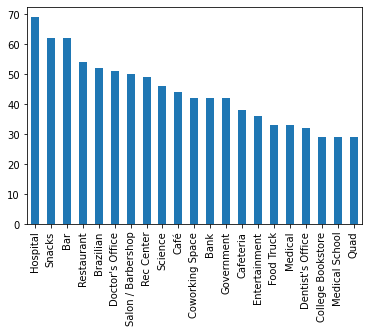

In [239]:
# Top 20 estabelecimentos comerciais próximos a faculdades no Rio de Janeiro
import matplotlib.pyplot as plt
barras[:21].plot.bar()
plt.show()

In [251]:
# Convertendo a distância para inteiros
df.distancia = df.distancia.astype(int)

In [267]:
quantidade_estabelecimentos_por_faculdade = df.groupby(by = ['nome_faculdade'])['categoria_short'].count()
quantidade_estabelecimentos_por_faculdade

nome_faculdade
Colégio e Faculdade Silva e Souza                   80
FEN/UERJ - Faculdade de Engenharia                  27
FGEL - Faculdade de Geologia                        28
Faculdade                                           68
Faculdade Béthencourt da Silva - FABES              85
Faculdade De Direito Uff sala 01                    41
Faculdade Gama Filho Piedade                        68
Faculdade Gama e Souza                              83
Faculdade Metodista Benett                          74
Faculdade Moraes Junior                             37
Faculdade Nacional de Direito (FND)                 62
Faculdade Pinheiro Guimarães                        78
Faculdade Presbiteriana Mackenzie Rio               88
Faculdade Senac Santa Luzia                         64
Faculdade São Leopoldo Mandic                       79
Faculdade de Administração e Finanças               30
Faculdade de Arqueologia- UERJ                      26
Faculdade de Arquitetura                          

In [269]:
media_distancia_faculda_ate_estabelecimento = round(df.groupby(by = ['nome_faculdade'])['distancia'].mean(),2)
media_distancia_faculda_ate_estabelecimento

nome_faculdade
Colégio e Faculdade Silva e Souza                  132.63
FEN/UERJ - Faculdade de Engenharia                  43.64
FGEL - Faculdade de Geologia                        61.80
Faculdade                                           46.51
Faculdade Béthencourt da Silva - FABES             671.37
Faculdade De Direito Uff sala 01                    69.41
Faculdade Gama Filho Piedade                       116.82
Faculdade Gama e Souza                             207.78
Faculdade Metodista Benett                         358.18
Faculdade Moraes Junior                             77.16
Faculdade Nacional de Direito (FND)                120.60
Faculdade Pinheiro Guimarães                       116.10
Faculdade Presbiteriana Mackenzie Rio               89.30
Faculdade Senac Santa Luzia                         35.54
Faculdade São Leopoldo Mandic                       84.60
Faculdade de Administração e Finanças               52.87
Faculdade de Arqueologia- UERJ                      74.54

In [252]:
media_distancia_faculda_ate_estabelecimento_por_categoria = df.groupby(by = ['nome_faculdade', 'categoria_short'])['distancia'].mean()
media_distancia_faculda_ate_estabelecimento_por_categoria

nome_faculdade                     categoria_short   
Colégio e Faculdade Silva e Souza  Arcade                110.00
                                   Athletics & Sports     87.00
                                   Automotive            129.50
                                   Brazilian             176.00
                                   Burgers                62.25
                                                          ...  
UFF - Faculdade de Educação        Rock Club              93.00
                                   Soccer                252.00
                                   Spiritual             138.00
                                   Strip Club            222.00
                                   Track                 194.00
Name: distancia, Length: 1634, dtype: float64

In [ ]:
# Média

In [ ]:
# Desvio Padrão da distância

In [263]:
std_estabelecimentos_por_faculdade = df.groupby(by = ['nome_faculdade'])['distancia'].std()
#std_estabelecimentos_por_faculdade = df.std()

In [264]:
std_estabelecimentos_por_faculdade

nome_faculdade
Colégio e Faculdade Silva e Souza                    51.090458
FEN/UERJ - Faculdade de Engenharia                   24.436182
FGEL - Faculdade de Geologia                         21.726196
Faculdade                                            48.083758
Faculdade Béthencourt da Silva - FABES              129.339263
Faculdade De Direito Uff sala 01                     34.969255
Faculdade Gama Filho Piedade                         59.324542
Faculdade Gama e Souza                               86.926402
Faculdade Metodista Benett                         2206.726156
Faculdade Moraes Junior                              36.279341
Faculdade Nacional de Direito (FND)                 113.354502
Faculdade Pinheiro Guimarães                        207.320302
Faculdade Presbiteriana Mackenzie Rio               126.983929
Faculdade Senac Santa Luzia                          27.163647
Faculdade São Leopoldo Mandic                        40.226171
Faculdade de Administração e Finanças   

# Clusterização com K-Means

In [ ]:
# utilizando a distância como métrica , média e densidade

In [270]:
df_final = pd.DataFrame({'quantidade_estabelecimentos_por_faculdade':quantidade_estabelecimentos_por_faculdade,
                         'media_distancia_faculda_ate_estabelecimento':media_distancia_faculda_ate_estabelecimento,
                         'std_estabelecimentos_por_faculdade':std_estabelecimentos_por_faculdade})

In [271]:
df_final

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
nome_faculdade,,,
Colégio e Faculdade Silva e Souza,80,132.63,51.090458
FEN/UERJ - Faculdade de Engenharia,27,43.64,24.436182
FGEL - Faculdade de Geologia,28,61.80,21.726196
Faculdade,68,46.51,48.083758
Faculdade Béthencourt da Silva - FABES,85,671.37,129.339263
Faculdade De Direito Uff sala 01,41,69.41,34.969255
Faculdade Gama Filho Piedade,68,116.82,59.324542
Faculdade Gama e Souza,83,207.78,86.926402
Faculdade Metodista Benett,74,358.18,2206.726156


In [272]:
df_final.shape

(46, 3)

In [273]:
# Normalização do Banco de Dados
data = df_final.values
data

array([[  80.        ,  132.63      ,   51.09045771],
       [  27.        ,   43.64      ,   24.43618186],
       [  28.        ,   61.8       ,   21.72619585],
       [  68.        ,   46.51      ,   48.08375756],
       [  85.        ,  671.37      ,  129.33926336],
       [  41.        ,   69.41      ,   34.96925479],
       [  68.        ,  116.82      ,   59.32454154],
       [  83.        ,  207.78      ,   86.92640243],
       [  74.        ,  358.18      , 2206.72615591],
       [  37.        ,   77.16      ,   36.27934139],
       [  62.        ,  120.6       ,  113.35450241],
       [  78.        ,  116.1       ,  207.32030186],
       [  88.        ,   89.3       ,  126.98392924],
       [  64.        ,   35.54      ,   27.16364659],
       [  79.        ,   84.6       ,   40.22617148],
       [  30.        ,   52.87      ,   26.25229125],
       [  26.        ,   74.54      ,   27.24588889],
       [  69.        ,  176.83      ,  443.86580366],
       [  29.        ,   94.

In [275]:
from sklearn.preprocessing import StandardScaler
cluster_dataset = StandardScaler().fit_transform(data)

In [279]:
# Modelagem: Aplicando o algoritmo K-Means 

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data)
labels = k_means.labels_
print(labels)

[0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 2 0 0 0 0 0 0]


In [285]:
data_scaled = pd.DataFrame(cluster_dataset, index=df_final.index, columns=df_final.columns)

In [286]:
# dados normalizados
data_scaled

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
nome_faculdade,,,
Colégio e Faculdade Silva e Souza,1.088555,0.126428,-0.211637
FEN/UERJ - Faculdade de Engenharia,-1.056876,-0.703823,-0.295310
FGEL - Faculdade de Geologia,-1.016396,-0.534395,-0.303817
Faculdade,0.602798,-0.677046,-0.221075
Faculdade Béthencourt da Silva - FABES,1.290955,5.152712,0.034001
Faculdade De Direito Uff sala 01,-0.490158,-0.463396,-0.262244
Faculdade Gama Filho Piedade,0.602798,-0.021075,-0.185788
Faculdade Gama e Souza,1.209995,0.827555,-0.099141
Faculdade Metodista Benett,0.845677,2.230742,6.555318


In [ ]:
corr = data_scaled.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(corr, ax=ax, cmap=cmap)

In [287]:
# Adicionando a Clusterização ao dataset normalizado
data_scaled["Cluster"] = labels
data_scaled.head(10)

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade,Clus_km
nome_faculdade,,,,
Colégio e Faculdade Silva e Souza,1.088555,0.126428,-0.211637,0
FEN/UERJ - Faculdade de Engenharia,-1.056876,-0.703823,-0.295310,0
FGEL - Faculdade de Geologia,-1.016396,-0.534395,-0.303817,0
Faculdade,0.602798,-0.677046,-0.221075,0
Faculdade Béthencourt da Silva - FABES,1.290955,5.152712,0.034001,2
Faculdade De Direito Uff sala 01,-0.490158,-0.463396,-0.262244,0
Faculdade Gama Filho Piedade,0.602798,-0.021075,-0.185788,0
Faculdade Gama e Souza,1.209995,0.827555,-0.099141,0
Faculdade Metodista Benett,0.845677,2.230742,6.555318,1


# No clustering os dados não são rotulados e o processo não é supervisionado. Divide-se os dados em grupos mutuamente exclusivos chamados de 
Clusters:  agrupamentos que compartilham atributos semelhantes


In [288]:
# verificar valores do centroide através da média das colunas de cada cluster
data_scaled.groupby('Clus_km').mean()

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
Clus_km,,,
0,-0.068575,-0.269648,-0.184119
1,0.845677,2.230742,6.555318
2,0.491478,2.206205,0.248388


<ipython-input-296-2f1966d5f54b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(data[:, 0], data[:, 1], s=None, c=labels.astype(np.float), alpha=0.5)


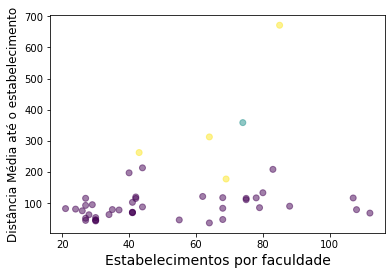

In [296]:
# Distribuição das faculdades de acordo com a quantidade de estabelecimentos próximos e a distância média até eles 
plt.scatter(data[:, 0], data[:, 1], s=None, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Estabelecimentos por faculdade', fontsize=14)
plt.ylabel('Distância Média até o estabelecimento', fontsize=12)

plt.show()

<ipython-input-298-2eab5e882eec>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-298-2eab5e882eec>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c= labels.astype(np.float))


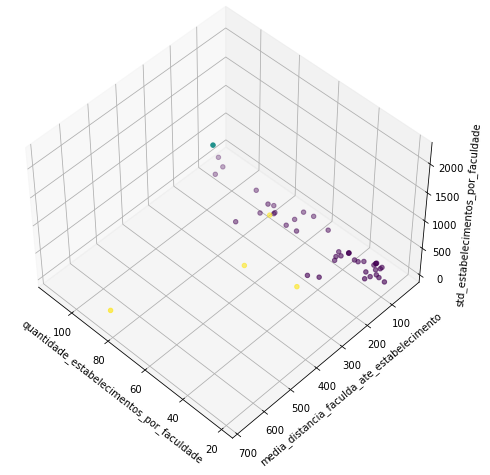

In [298]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('quantidade_estabelecimentos_por_faculdade')
ax.set_ylabel('media_distancia_faculda_ate_estabelecimento')
ax.set_zlabel('std_estabelecimentos_por_faculdade')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c= labels.astype(np.float))

In [ ]:
# Aplicando o K-Means foi possível dividir as faculdades cariocas em três grupos mutuamente exclusivos. Cada cluster possui faculdades semelhantes entre si.
# POdemos criar um perfil de faculdade para cada segmento, considerando as caracteristicas comuns de cada cluster  